Plots: FitInterferometerPlotter
===============================

This example illustrates how to plot an `FitInterferometer` object using an `FitInterferometerPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import numpy as np
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load example interferometer of of a strong lens as an `Interferometer` object.

In [2]:
dataset_name = "mass_sie__source_sersic"
dataset_path = path.join("dataset", "interferometer", dataset_name)

interferometer = al.Interferometer.from_fits(
    visibilities_path=path.join(dataset_path, "visibilities.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    uv_wavelengths_path=path.join(dataset_path, "uv_wavelengths.fits"),
)

We now mask the data and fit it with a `Tracer` to create a `FitInterferometer` object.

In [3]:
real_space_mask = al.Mask2D.circular(
    shape_native=(200, 200), pixel_scales=0.05, radius=3.0
)
visibilities_mask = np.full(fill_value=False, shape=interferometer.visibilities.shape)

masked_interferometer = al.MaskedInterferometer(
    interferometer=interferometer,
    visibilities_mask=visibilities_mask,
    real_space_mask=real_space_mask,
    settings=al.SettingsMaskedInterferometer(transformer_class=al.TransformerNUFFT),
)

lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllipticalIsothermal(
        centre=(0.0, 0.0),
        einstein_radius=1.6,
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.9, phi=45.0),
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.EllipticalSersic(
        centre=(0.1, 0.1),
        elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.8, phi=60.0),
        intensity=0.3,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

fit = al.FitInterferometer(masked_interferometer=masked_interferometer, tracer=tracer)

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/pynufft/linalg/nufft_cpu.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  output_x.ravel()[self.KdCPUorder * self.batch + bat] = xx.ravel()[


We now pass the FitInterferometer to an `FitInterferometerPlotter` and call various `figure_*` methods 
to plot different attributes.

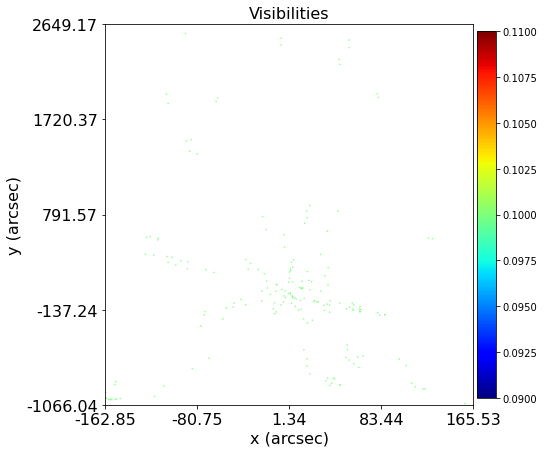

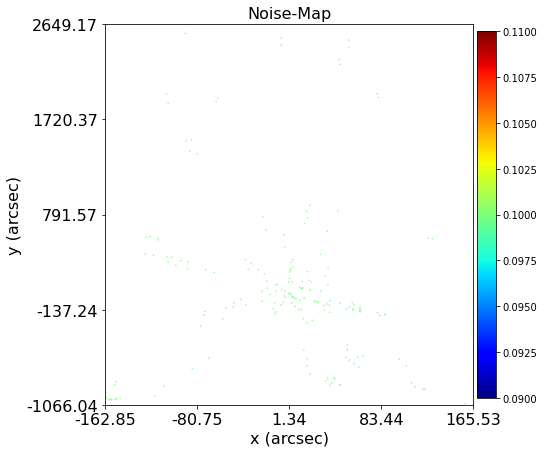

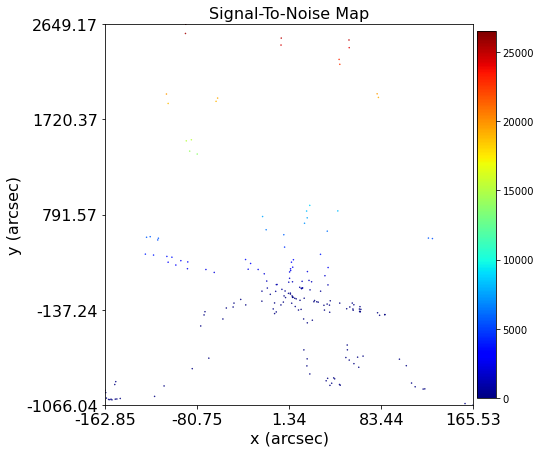

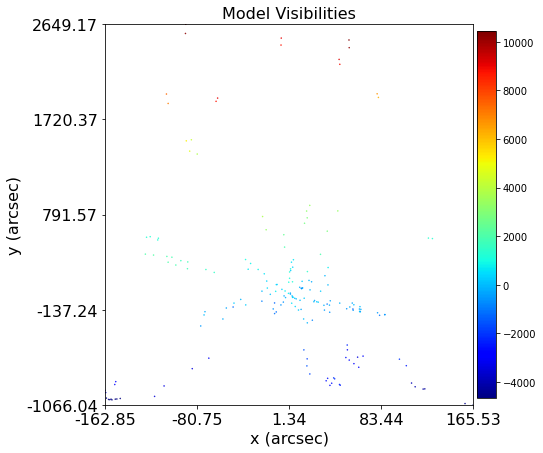

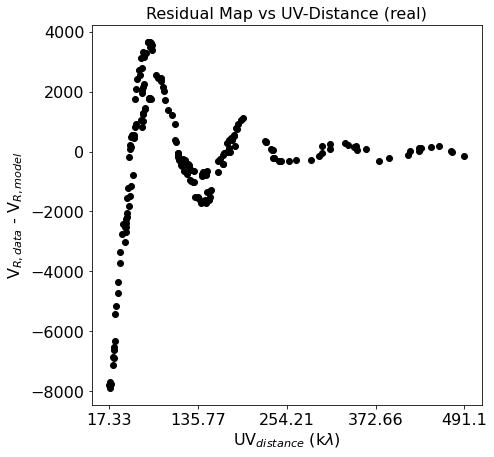

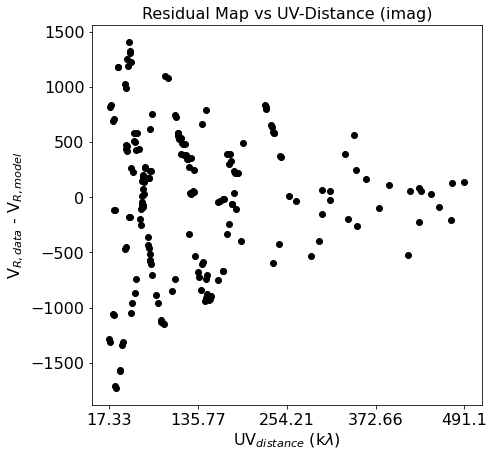

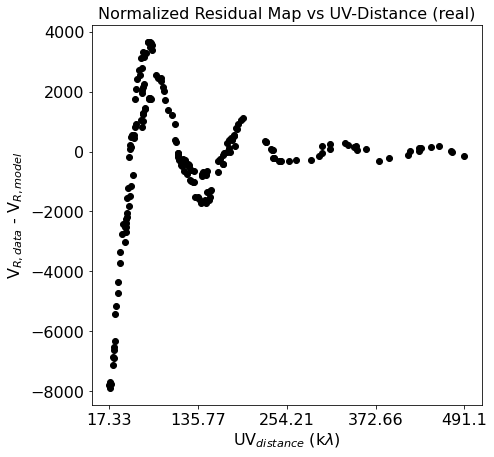

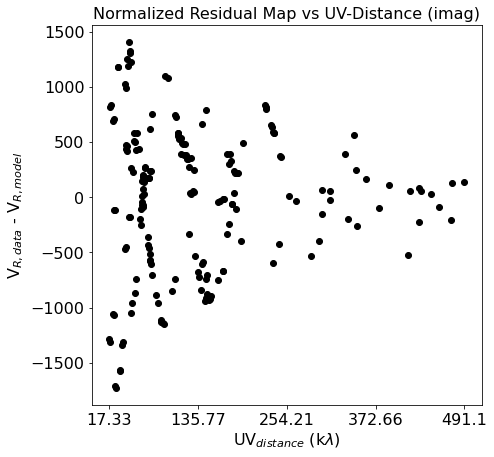

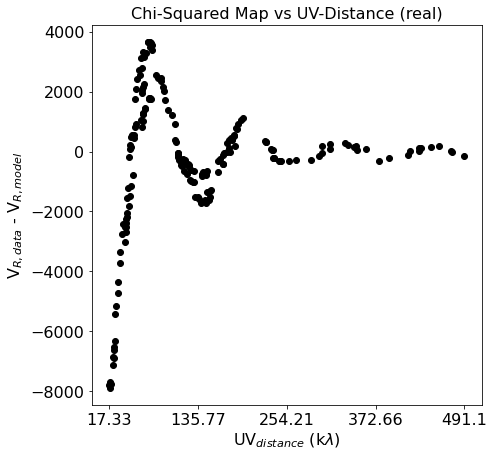

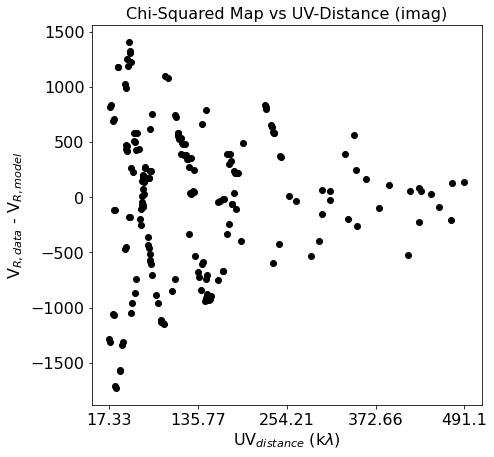

In [4]:
fit_interferometer_plotter = aplt.FitInterferometerPlotter(fit=fit)
fit_interferometer_plotter.figures(
    visibilities=True,
    noise_map=True,
    signal_to_noise_map=True,
    model_visibilities=True,
    residual_map_real=True,
    residual_map_imag=True,
    normalized_residual_map_real=True,
    normalized_residual_map_imag=True,
    chi_squared_map_real=True,
    chi_squared_map_imag=True,
)

The `FitInterferometerPlotter` may also plot a subplot of these attributes.

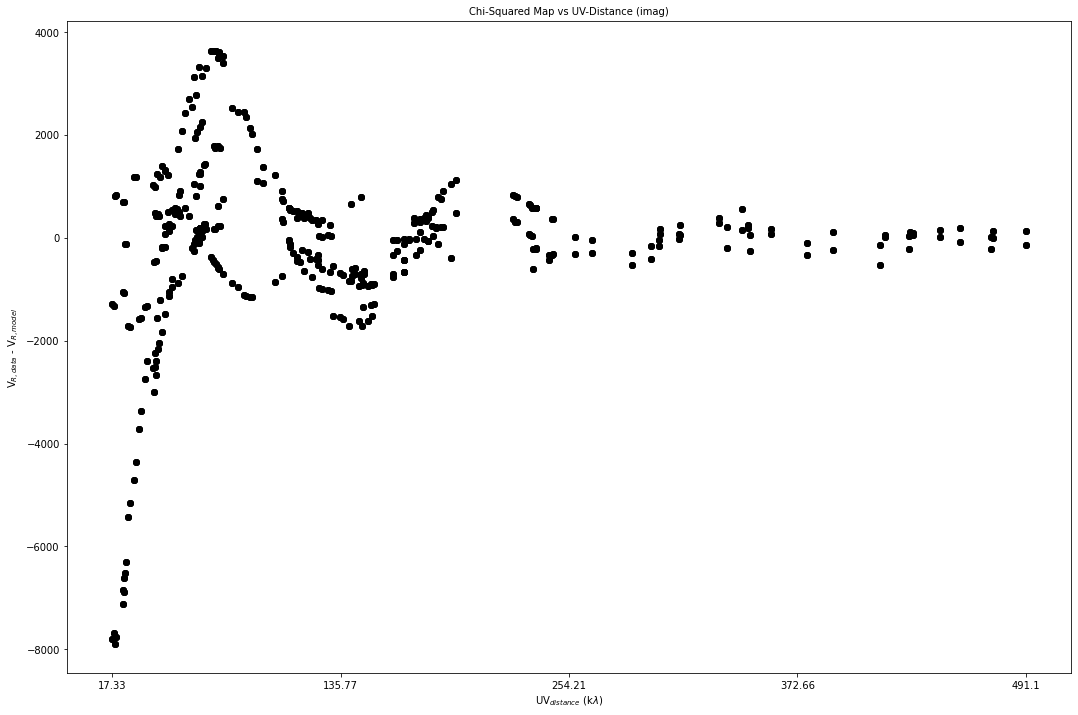

In [5]:
fit_interferometer_plotter.subplot_fit_interferometer()

It can plot of the image of an input plane, where this image is the real-space image of the `Tracer`.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


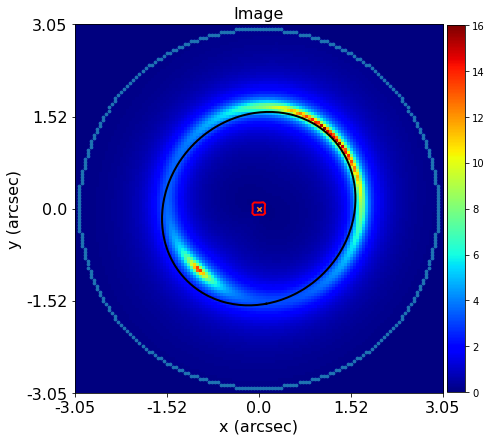

In [6]:
fit_interferometer_plotter.figures(image=True)

It can also plot the plane-image of a plane, that is what the source galaxy looks like without lensing (e.g. 
for `plane_index=1` this is the source-plane image)

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


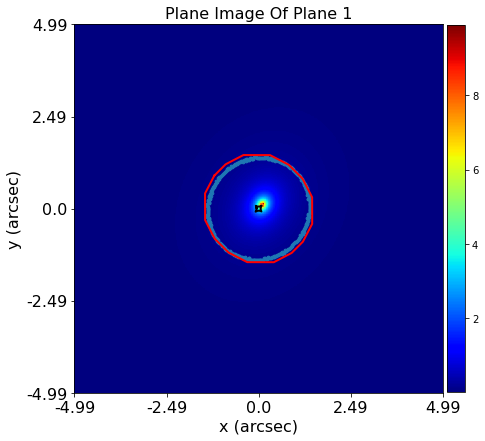

In [7]:
fit_interferometer_plotter.figures_of_planes(plane_image=True, plane_index=0)
fit_interferometer_plotter.figures_of_planes(plane_image=True, plane_index=1)

These can be combined to plot the appearance of the galaxy in real-space.

/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/jammy/venvs/PyAuto/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


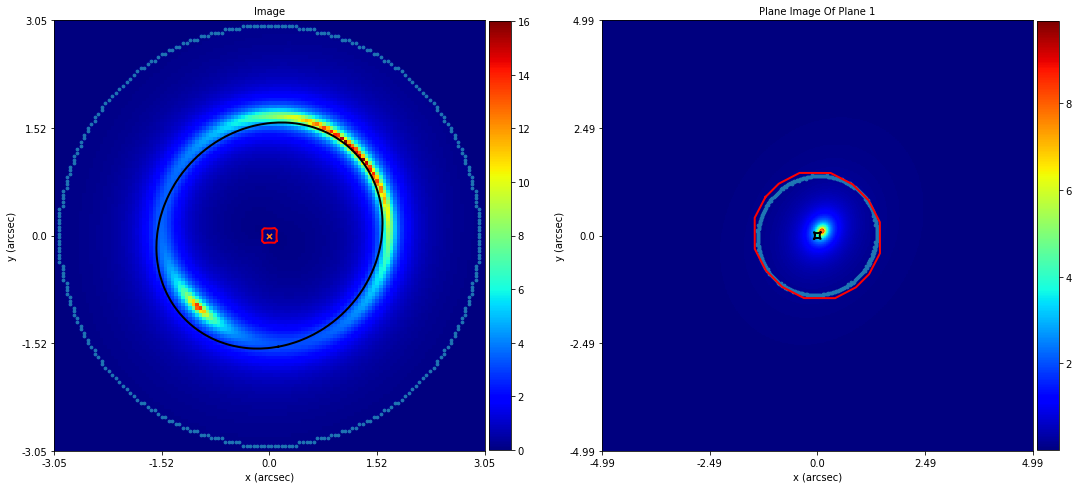

In [8]:
fit_interferometer_plotter.subplot_fit_real_space()

Finish.